In [5]:
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Data_Sets/p4/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from IPython import display
from sklearn import preprocessing
import grafica as gr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Parte 2 - Multiperceptrón con Tensorflow/Keras

## Ejercicio 7

Re-implemente el modelo del ejercicio 4 (Balance.csv) utilizando un Multiperceptrón Tensorflow/Keras.  


/home/manuel/Documents/Facultad/DeepLearning/env/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Exactitud Train: 0.960
Exactitud Test : 0.944
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Matriz de confusión (Train):
 [[229   1   3]
 [  5  26   7]
 [  4   0 225]]

Matriz de confusión (Test):
 [[55  0  0]
 [ 6  4  1]
 [ 0  0 59]]


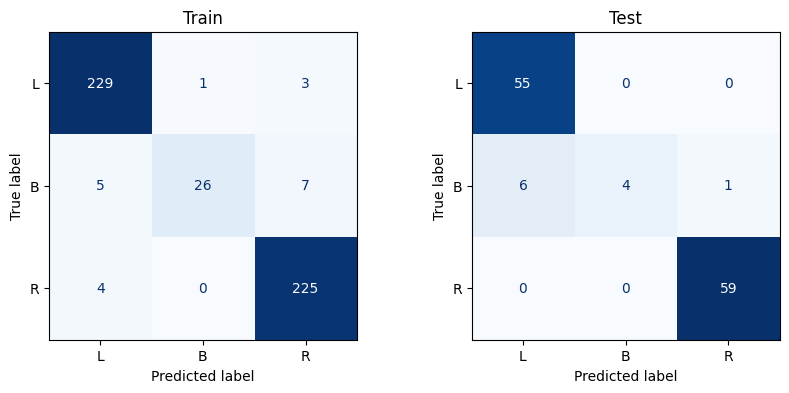

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Ejemplo de salidas softmax (primeras 5 en Train):
[[9.7011798e-05 1.3686926e-02 9.8621607e-01]
 [4.7345627e-03 1.3333708e-01 8.6192834e-01]
 [1.2575957e-04 1.4522486e-02 9.8535174e-01]
 [4.6831536e-01 2.6105171e-01 2.7063295e-01]
 [1.1620599e-04 1.0028485e-02 9.8985529e-01]]

Ejemplo de salidas softmax (primeras 5 en Test):
[[1.2240753e-02 1.8468639e-01 8.0307293e-01]
 [9.9989510e-01 1.0494790e-04 9.1651264e-09]
 [9.4358146e-01 5.3624824e-02 2.7938059e-03]
 [1.2975848e-01 2.7543741e-01 5.9480417e-01]
 [9.9995804e-01 4.1962816e-05 1.0669329e-09]]


In [12]:
data = pd.read_csv(DATOS_DIR + 'Balance.csv', sep=',')

# Separar variables y etiquetas
X = data.iloc[:, 1:].values   # desde la segunda columna
T = data.iloc[:, 0].values    # primera columna = clase

# Mapear etiquetas (L,B,R) -> (0,1,2)
mapeo = { 'L':0, 'B':1, 'R':2 }
T = np.array([mapeo[clase] for clase in T])

# Normalización Z-score
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División train-test
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

# 2. Modelo Keras
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='tanh'))  # capa oculta con 5 neuronas
model.add(Dense(3, activation='softmax'))  # salida para 3 clases

# Compilar modelo
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entrenamiento
history = model.fit(X_train, T_train,batch_size=32,
                    epochs=800,
                    verbose=0,  # cambiar a 1 si querés ver la salida
                    validation_data=(X_test, T_test))

# 4. Evaluación
train_loss, train_acc = model.evaluate(X_train, T_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, T_test, verbose=0)

print(f"Exactitud Train: {train_acc:.3f}")
print(f"Exactitud Test : {test_acc:.3f}")

y_pred_train = np.argmax(model.predict(X_train), axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

# 6. Matriz de confusión

cm_train = confusion_matrix(T_train, y_pred_train)
cm_test = confusion_matrix(T_test, y_pred_test)

print("\nMatriz de confusión (Train):\n", cm_train)
print("\nMatriz de confusión (Test):\n", cm_test)

# Dibujar matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ConfusionMatrixDisplay(cm_train, display_labels=['L','B','R']).plot(ax=ax[0], cmap="Blues", colorbar=False)
ax[0].set_title("Train")

ConfusionMatrixDisplay(cm_test, display_labels=['L','B','R']).plot(ax=ax[1], cmap="Blues", colorbar=False)
ax[1].set_title("Test")

plt.show()

# 7. Salidas softmax

softmax_train = model.predict(X_train)
softmax_test = model.predict(X_test)

print("\nEjemplo de salidas softmax (primeras 5 en Train):")
print(softmax_train[:5])

print("\nEjemplo de salidas softmax (primeras 5 en Test):")
print(softmax_test[:5])

